<a href="https://colab.research.google.com/github/rakshith3101/deep-learning/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TENSORFLOW TIME SERIES FORECASTING(BITCOIN PRICE PREDICTION)**

Hey Avid Learner out there!📖,in this project I made an attempt of predicting the bitcoin price💰 utilizing the data available. 
I've extracted the data from https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv who is the mentor of mine in deep learning neural network journey.

In [8]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2022-10-20 07:01:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-10-20 07:01:18 (62.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In this project I've used most of the machine learning library like 


*   pandas
*   numpy
*   scikit-learning
*   Tensorflow (obviously)
*   matplotlib and many more







In [9]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],index_col=["Date"])
df.head
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


This is the bitcoin data from the year 2013 to 2021📈 which contains the Date and Price 





In [10]:
bitcoin_prize=pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Prize"})
bitcoin_prize

,Prize
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


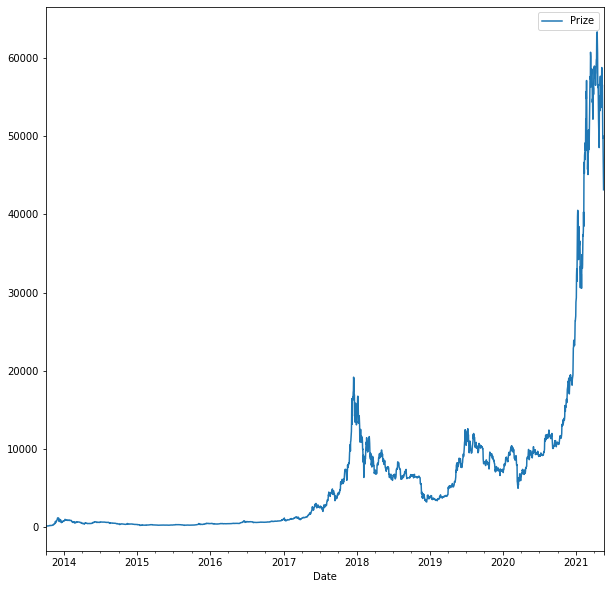

In [11]:
#matplotlib for representing the data in a grapical form
import matplotlib.pyplot as plt
bitcoin_prize.plot(figsize=(10,10))

In [12]:
import csv
from datetime import datetime
timesnap=[]
btcp=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
    csv_reader=csv.reader(f,delimiter=',')
    next(csv_reader)
    for line in csv_reader:
        timesnap.append(datetime.strptime(line[1],'%Y-%m-%d'))
        btcp.append(float(line[2]))
timesnap[:10],btcp[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

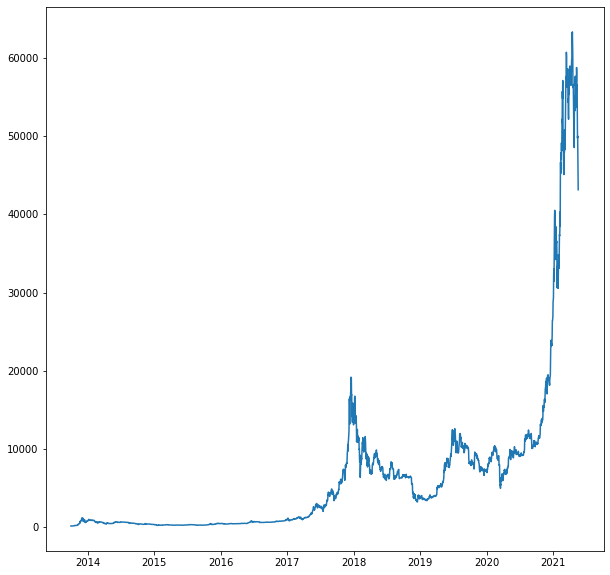

In [13]:
plt.figure(figsize=(10,10))
plt.plot(timesnap,btcp)


In [14]:
#converting the data to numpy values using to_numpy
timesnap=bitcoin_prize.index.to_numpy()
btcp=bitcoin_prize["Prize"].to_numpy()
timesnap[:10],btcp[:10]


(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

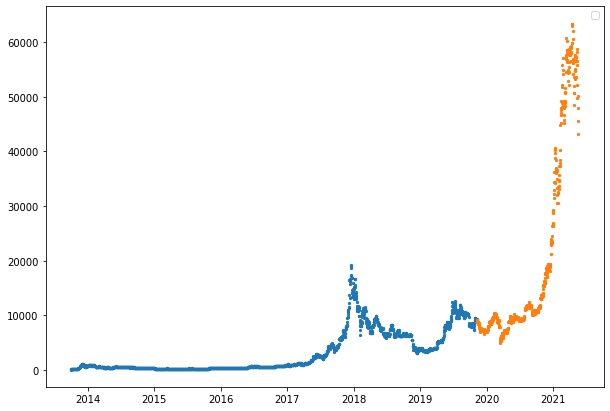

In [15]:
# Spliting the model in any machine learning model plays a vital role in training
# models. We split the data into x_train, y_train( training datas) and x_test, y_test(testing datas)
split_size=int(0.8*len(btcp))#split size is set to 80 percent of the totol value
x_train,y_train=timesnap[:split_size],btcp[:split_size]
x_test,y_test=timesnap[split_size:],btcp[split_size:]
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5)
plt.scatter(x_test,y_test,s=5)
plt.legend()
plt.show() #plotting the train_data and test_data


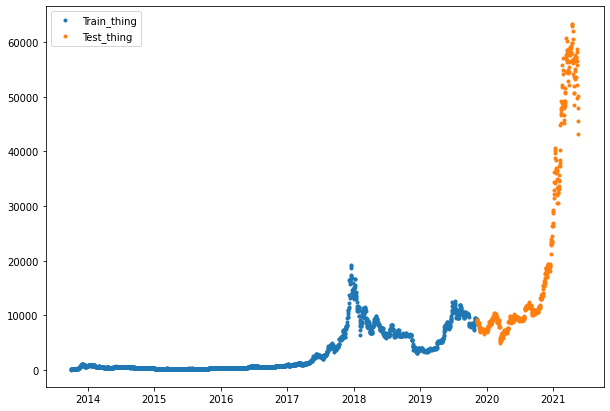

In [16]:
#creating the method for plotting the data using matplotlib library
def plotting(timesnaps,value,format='.',start=0,end=None,label=None):
    
    plt.plot(timesnaps[start:end],value[start:end],format,label=label)
    if label:
        plt.legend()
    plt.grid()
plt.figure(figsize=(10,7))
plotting(x_train,y_train,label='Train_thing')
plotting(x_test,y_test,label='Test_thing')

# **NAVIE FORECASTING MODEL**
Navie forecasting is the simplest yet more efficient model among other time series forecasting model (depends on the model definition as well). This model is the reference to the other model given below

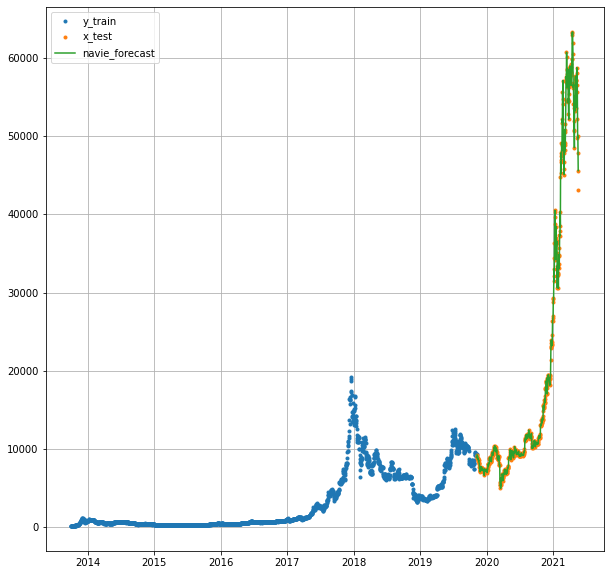

In [17]:
navie_forecasting=y_test[:-1]
plt.figure(figsize=(10,10))
plotting(timesnaps=x_train,value=y_train,label='y_train')
plotting(timesnaps=x_test,value=y_test,label='x_test')
plotting(timesnaps=x_test[1:],value=navie_forecasting,format='-',label='navie_forecast')

In [18]:
#tensorflow is the open source platform for creating and evaluting the model which provides various functionality
#🔑https://www.tensorflow.org/
import tensorflow as tf


🔍Evaluating our model the most important task as a DL model developer. Usage of diffrent evaluation metrics has a remarkable effect on model performance

In [19]:
# In this block we've used mean_absoulte error to evaluate our model perfomance
def MASE(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_navie=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return mae/mae_navie
MASE(y_test[1:],navie_forecasting).numpy()

0.9995699939182624

In [20]:
# Creating the method for all error analysis metrics 
def eval_mase(y_true,y_pred):
    y_true=tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)#mean_absolute_error
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)#mean_square_error
    rmse=tf.sqrt(mse)#Root_mean_square_erro
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)#mean_absolute_percentage_error
    mase=MASE(y_true,y_pred)#mean_absolute_squared_error
    return {"mae":mae.numpy(),
            "mse":mse.numpy(),
           "rmse":rmse.numpy(),
           "mape":mape.numpy(),
           "mase":mase.numpy()}
M0_result=eval_mase(y_true=y_test[1:],y_pred=y_test[:-1])
M0_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [21]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

# **WINDOWING MODEL**
Dotted line in the below diagram are the windows. In windowing model set of values are used in predicting the next output

---


eg: windows=[1,3,5,7,9] -> horizon(output)=11

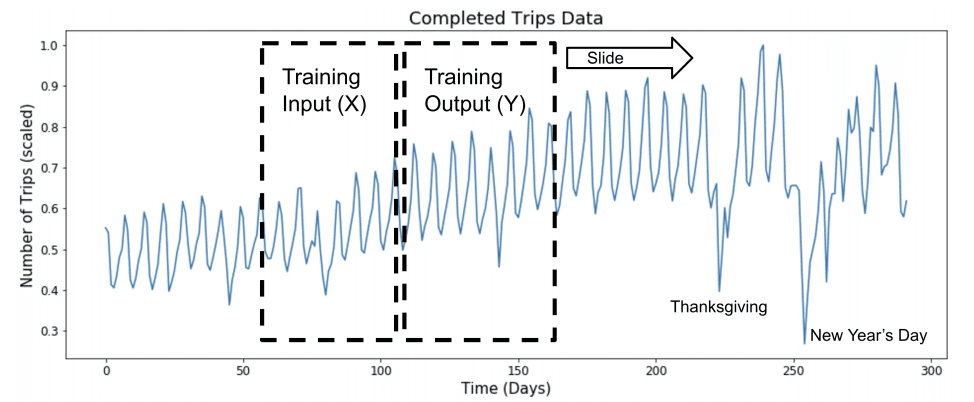

In [22]:
def get_label(x,horizon=1):
    return x[:,:-horizon],x[:,-horizon:]
test_window, test_label=get_label(tf.expand_dims(tf.range(8)+1,axis=0),horizon=1)
print(f"Window: {tf.squeeze(test_window).numpy()}-> Label:{tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7]-> Label:8


In [23]:
#method for creating the window for the bitcoin model
import numpy as np
def make_window(x,window_size=7,horizon=1):
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_index= window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    window_array= x[window_index]
    window,label= get_label(window_array,horizon=1)
    return window,label


In [24]:
full_window,full_label=make_window(x=btcp,window_size=7,horizon=1)


In [25]:
def make_split(windows, labels ,test_split=0.2):
    split_size=int(len(windows)*0.8)
    train_window=windows[:split_size]
    train_label=labels[:split_size]
    test_label=labels[split_size:]
    test_window=windows[split_size:]
    return train_window,train_label,test_window,test_label


In [26]:
train_window,train_label,test_window,test_label=make_split(full_window,full_label)

In [27]:
len(train_label
    )

2224

In [28]:
#callbacks are used while fitting our model there are many callbacs offered by tenosrflow 👉🏽https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
import os
def model_checkpoint(model,file_path="model_results"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path,model),
                                              save_best_only=True)

In [29]:
HORIZON=1

**Creating the Dense model for the windows of size 7 and horizon of size 1.**


This model consists of 

1.   Dense layer(creating the neural networks)
2.   compile layer (loss evaluation,optimizers,metrics)
3.   fit layer ( where train_data are dumped into the Dense model created)






In [31]:
import tensorflow as tf
from  tensorflow.keras import layers
model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),# Many time series model perform well on rectified linear unit activation
    layers.Dense(1,activation="linear") # output layer is usually linear
],name='model_1')
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_1.fit(x=train_window,
            y=train_label,
            epochs=10,
            batch_size=128,
            validation_data=(test_window,test_label),
            callbacks=[model_checkpoint(model_1.name)])

Epoch 1/10
18/18 [==============================] - 1s 36ms/step - loss: 3527.9009 - mae: 3527.9009 - val_loss: 12945.5107 - val_mae: 12945.5107
Epoch 2/10
18/18 [==============================] - 0s 23ms/step - loss: 877.7325 - mae: 877.7325 - val_loss: 2545.5327 - val_mae: 2545.5327
Epoch 3/10
18/18 [==============================] - 0s 28ms/step - loss: 293.9279 - mae: 293.9279 - val_loss: 1375.6318 - val_mae: 1375.6318
Epoch 4/10
18/18 [==============================] - 0s 25ms/step - loss: 193.0504 - mae: 193.0504 - val_loss: 1129.0088 - val_mae: 1129.0088
Epoch 5/10
18/18 [==============================] - 1s 50ms/step - loss: 179.5825 - mae: 179.5825 - val_loss: 1039.3364 - val_mae: 1039.3364
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 180.0480 - mae: 180.0480 - val_loss: 1051.5249 - val_mae: 1051.5249
Epoch 7/10
18/18 [==============================] - 1s 40ms/step - loss: 177.8486 - mae: 177.8486 - val_loss: 988.9530 - val_mae: 988.9530
Epoch 8/10
1

In [32]:
#finally evaluting the the window model
model_1.evaluate(test_window,test_label)
model_1=tf.keras.models.load_model("model_results/model_1")


18/18 [==============================] - 0s 1ms/step - loss: 959.4996 - mae: 959.4996


In [33]:
model_1.evaluate(test_window,test_label)

18/18 [==============================] - 0s 2ms/step - loss: 959.4996 - mae: 959.4996


[959.4995727539062, 959.4995727539062]

In [34]:
# after training our model we need to check our model prediction
def predicting(model,input_):
    pred_output=model.predict(input_)
    return tf.squeeze(pred_output)
model_predict=predicting(model_1,test_window)

18/18 [==============================] - 0s 1ms/step


In [35]:
g=tf.squeeze(test_label)

In [36]:
model1_result=eval_mase(y_true=tf.squeeze(test_label),y_pred =model_predict)
model1_result

{'mae': 959.4993,
 'mse': 2917037.0,
 'rmse': 1707.9336,
 'mape': 4.2217045,
 'mase': 1.6855745}

<Figure size 720x720 with 0 Axes>

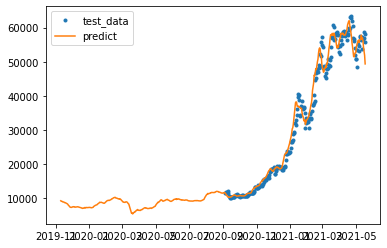

<Figure size 720x720 with 0 Axes>

In [37]:
plotting(timesnaps=x_test[-len(test_window):],value=test_window[:,0],start=300,label="test_data")
plotting(timesnaps=x_test[-len(test_window):],value=model_predict,format='-',label='predict')
plt.figure(figsize=(10,10))

# **WITH HORIZON SIZE 7**

In [38]:
HORIZON=7
WINDOW_SIZE=30
full_window,full_label=make_window(btcp,window_size=WINDOW_SIZE,horizon=HORIZON)
train_window,train_label,test_window,test_label=make_split(full_window,full_label)

In [39]:
train_window.shape

(2200, 36)

In [40]:
#import tensorflow as tf
from  tensorflow.keras import layers
model_2=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name='model_2')
model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_2.fit(x=train_window,
            y=train_label,
            epochs=10,
            batch_size=128,
            validation_data=(test_window,test_label),
            callbacks=[model_checkpoint(model_2.name)])
            

Epoch 1/10
18/18 [==============================] - 1s 27ms/step - loss: 1941.2788 - mae: 1941.2788 - val_loss: 2805.0583 - val_mae: 2805.0583
Epoch 2/10
18/18 [==============================] - 0s 24ms/step - loss: 540.5380 - mae: 540.5380 - val_loss: 2499.8027 - val_mae: 2499.8027
Epoch 3/10
18/18 [==============================] - 0s 24ms/step - loss: 343.9918 - mae: 343.9918 - val_loss: 1629.4974 - val_mae: 1629.4974
Epoch 4/10
18/18 [==============================] - 0s 23ms/step - loss: 279.2769 - mae: 279.2769 - val_loss: 1616.0858 - val_mae: 1616.0858
Epoch 5/10
18/18 [==============================] - 0s 27ms/step - loss: 245.8114 - mae: 245.8114 - val_loss: 1361.7244 - val_mae: 1361.7244
Epoch 6/10
18/18 [==============================] - 0s 28ms/step - loss: 225.8180 - mae: 225.8180 - val_loss: 1245.8838 - val_mae: 1245.8838
Epoch 7/10
18/18 [==============================] - 0s 27ms/step - loss: 215.7031 - mae: 215.7031 - val_loss: 1191.4004 - val_mae: 1191.4004
Epoch 8/10


In [41]:
model_2.evaluate(test_window,test_label)

18/18 [==============================] - 0s 1ms/step - loss: 1117.1351 - mae: 1117.1351


[1117.1351318359375, 1117.1351318359375]

In [42]:
model_2_pred=predicting(model_2,input_=test_window)
model_2_pred

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9437.194,  9077.496,  9511.62 , ...,  9262.955,  8934.381,
         9496.805],
       [ 9304.712,  9168.356,  9238.295, ...,  9145.899,  9022.4  ,
         9375.811],
       [ 9115.989,  9140.097,  9218.472, ...,  9138.236,  9126.79 ,
         9017.715],
       ...,
       [56439.93 , 55180.918, 55607.41 , ..., 54221.637, 53930.02 ,
        57170.26 ],
       [55418.12 , 54800.043, 55332.02 , ..., 52577.836, 53065.79 ,
        53392.68 ],
       [52953.113, 51836.68 , 55445.887, ..., 52181.04 , 50732.27 ,
        54164.57 ]], dtype=float32)>

In [43]:
def eval_2d(y_true,y_pred):
    y_true=tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=MASE(y_true,y_pred)
    if mae.ndim>0:
        mae=tf.reduce_mean(mae)
        mse=tf.reduce_mean(mse)
        rmse=tf.reduce_mean(rmse)
        mape=tf.reduce_mean(mape)
        mase=tf.reduce_mean(mase)
    return {"mae":mae.numpy(),
            "mse":mse.numpy(),
           "rmse":rmse.numpy(),
           "mape":mape.numpy(),
           "mase":mase.numpy()}
model_2_results=eval_2d(y_true=test_label,y_pred=model_2_pred)
model_2_results


{'mae': 1117.1351,
 'mse': 4135551.2,
 'rmse': 1203.7212,
 'mape': 5.1585965,
 'mase': 1.9497916}

<Figure size 720x720 with 0 Axes>

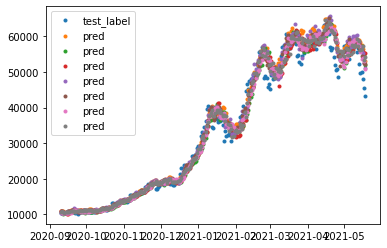

<Figure size 720x720 with 0 Axes>

In [44]:
plotting(timesnaps=x_test[-len(test_window):],value=test_label[:,0],start=300,label='test_label')
plotting(timesnaps=x_test[-len(test_window):],value=model_2_pred,start=300,label='pred')
plt.figure(figsize=(10,10))

#**CONV1D MODEL**(convolution 1D model)

In [45]:
HORIZON=1
WINDOW=7
full_window,full_label=make_window(btcp,window_size=WINDOW,horizon=HORIZON)
train_window,train_label,test_window,test_label=make_split(full_window,full_label)

In [46]:
full_label

array([[  123.033     ],
       [  124.049     ],
       [  125.96116   ],
       ...,
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]])

In [47]:
x =tf.constant(train_window[0])
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))
print(expand_dims_layer(x))

tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [48]:

model_3=tf.keras.Sequential([layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
                                    layers.Conv1D(filters=128,kernel_size=5,padding="causal",activation='relu'),
                                    layers.Dense(HORIZON)],name='model_3')
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
model_3.fit(train_window,train_label,
            epochs=50,
            batch_size=128,
            validation_data=(test_window,test_label),
            callbacks=[model_checkpoint(model_3.name)])

Epoch 1/50
 1/18 [>.............................] - ETA: 6s - loss: 3871.5164

18/18 [==============================] - 2s 65ms/step - loss: 2133.1516 - val_loss: 2727.6592
Epoch 2/50
 1/18 [>.............................] - ETA: 0s - loss: 498.4145

18/18 [==============================] - 1s 36ms/step - loss: 366.3405 - val_loss: 1102.7759
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 220.7792 - val_loss: 1109.8412
Epoch 4/50
 1/18 [>.............................] - ETA: 0s - loss: 209.3250

18/18 [==============================] - 1s 37ms/step - loss: 191.3422 - val_loss: 1036.7645
Epoch 5/50
 1/18 [>.............................] - ETA: 0s - loss: 257.8686

18/18 [==============================] - 1s 35ms/step - loss: 188.1641 - val_loss: 1020.8627
Epoch 6/50
 1/18 [>.............................] - ETA: 0s - loss: 199.9402

18/18 [==============================] - 1s 37ms/step - loss: 182.3031 - val_loss: 1010.4316
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 178.5724 - val_loss: 1058.7954
Epoch 8/50
 1/18 [>.............................] - ETA: 0s - loss: 211.0058

18/18 [==============================] - 1s 38ms/step - loss: 177.5589 - val_loss: 987.9957
Epoch 9/50
 1/18 [>.............................] - ETA: 0s - loss: 174.8765

18/18 [==============================] - 1s 34ms/step - loss: 175.1373 - val_loss: 983.4651
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 176.1482 - val_loss: 1082.9821
Epoch 11/50
 1/18 [>.............................] - ETA: 0s - loss: 206.6406

18/18 [==============================] - 1s 36ms/step - loss: 170.9535 - val_loss: 954.5075
Epoch 12/50
 1/18 [>.............................] - ETA: 0s - loss: 154.4888

18/18 [==============================] - 1s 38ms/step - loss: 168.2749 - val_loss: 937.7853
Epoch 13/50
18/18 [==============================] - 0s 3ms/step - loss: 165.7731 - val_loss: 988.9987
Epoch 14/50
 1/18 [>.............................] - ETA: 0s - loss: 170.7657

18/18 [==============================] - 1s 41ms/step - loss: 164.0014 - val_loss: 898.1894
Epoch 15/50
18/18 [==============================] - 0s 3ms/step - loss: 160.2698 - val_loss: 904.3403
Epoch 16/50
 1/18 [>.............................] - ETA: 0s - loss: 171.1351

18/18 [==============================] - 1s 40ms/step - loss: 156.8978 - val_loss: 875.1250
Epoch 17/50
 1/18 [>.............................] - ETA: 0s - loss: 115.9819

18/18 [==============================] - 1s 67ms/step - loss: 154.9424 - val_loss: 855.7846
Epoch 18/50
18/18 [==============================] - 0s 4ms/step - loss: 151.0154 - val_loss: 919.9117
Epoch 19/50
 1/18 [>.............................] - ETA: 0s - loss: 137.5325

18/18 [==============================] - 1s 37ms/step - loss: 149.4691 - val_loss: 834.7905
Epoch 20/50
 1/18 [>.............................] - ETA: 0s - loss: 160.7832

18/18 [==============================] - 1s 32ms/step - loss: 148.5822 - val_loss: 823.3154
Epoch 21/50
18/18 [==============================] - 0s 2ms/step - loss: 144.1807 - val_loss: 849.0640
Epoch 22/50
 1/18 [>.............................] - ETA: 0s - loss: 138.9231

18/18 [==============================] - 1s 40ms/step - loss: 142.8278 - val_loss: 799.0779
Epoch 23/50
 1/18 [>.............................] - ETA: 0s - loss: 116.1189

18/18 [==============================] - 1s 37ms/step - loss: 144.6348 - val_loss: 771.6804
Epoch 24/50
 1/18 [>.............................] - ETA: 0s - loss: 108.4558

18/18 [==============================] - 1s 34ms/step - loss: 142.0571 - val_loss: 761.1531
Epoch 25/50
18/18 [==============================] - 0s 2ms/step - loss: 138.8452 - val_loss: 761.3929
Epoch 26/50
 1/18 [>.............................] - ETA: 0s - loss: 174.3366

18/18 [==============================] - 1s 42ms/step - loss: 136.5744 - val_loss: 748.8979
Epoch 27/50
 1/18 [>.............................] - ETA: 0s - loss: 151.7363

18/18 [==============================] - 1s 38ms/step - loss: 134.3484 - val_loss: 738.1708
Epoch 28/50
 1/18 [>.............................] - ETA: 0s - loss: 119.1069

18/18 [==============================] - 1s 35ms/step - loss: 135.7410 - val_loss: 727.3339
Epoch 29/50
 1/18 [>.............................] - ETA: 0s - loss: 165.8927

18/18 [==============================] - 1s 36ms/step - loss: 131.2906 - val_loss: 715.8126
Epoch 30/50
18/18 [==============================] - 0s 3ms/step - loss: 133.2187 - val_loss: 749.7329
Epoch 31/50
18/18 [==============================] - 0s 3ms/step - loss: 131.8621 - val_loss: 774.4371
Epoch 32/50
18/18 [==============================] - 0s 4ms/step - loss: 129.5489 - val_loss: 785.0110
Epoch 33/50
 1/18 [>.............................] - ETA: 0s - loss: 134.0941

18/18 [==============================] - 1s 36ms/step - loss: 128.1450 - val_loss: 691.8583
Epoch 34/50
 1/18 [>.............................] - ETA: 0s - loss: 137.1980

18/18 [==============================] - 1s 33ms/step - loss: 123.3648 - val_loss: 680.7236
Epoch 35/50
 1/18 [>.............................] - ETA: 0s - loss: 102.6484

18/18 [==============================] - 1s 63ms/step - loss: 122.2741 - val_loss: 672.3253
Epoch 36/50
18/18 [==============================] - 0s 4ms/step - loss: 121.4056 - val_loss: 709.8115
Epoch 37/50
18/18 [==============================] - 0s 3ms/step - loss: 126.5829 - val_loss: 725.5305
Epoch 38/50
18/18 [==============================] - 0s 4ms/step - loss: 124.8021 - val_loss: 688.3231
Epoch 39/50
18/18 [==============================] - 0s 4ms/step - loss: 124.0857 - val_loss: 709.8373
Epoch 40/50
 1/18 [>.............................] - ETA: 0s - loss: 112.5499

18/18 [==============================] - 1s 41ms/step - loss: 123.3844 - val_loss: 657.0630
Epoch 41/50
18/18 [==============================] - 0s 3ms/step - loss: 124.4673 - val_loss: 719.1669
Epoch 42/50
18/18 [==============================] - 0s 3ms/step - loss: 131.0144 - val_loss: 681.3110
Epoch 43/50
 1/18 [>.............................] - ETA: 0s - loss: 147.9187

18/18 [==============================] - 1s 37ms/step - loss: 120.6667 - val_loss: 653.5192
Epoch 44/50
 1/18 [>.............................] - ETA: 0s - loss: 88.8239

18/18 [==============================] - 1s 35ms/step - loss: 119.7635 - val_loss: 638.6680
Epoch 45/50
 1/18 [>.............................] - ETA: 0s - loss: 143.8564

18/18 [==============================] - 1s 38ms/step - loss: 116.3567 - val_loss: 637.8512
Epoch 46/50
 1/18 [>.............................] - ETA: 0s - loss: 109.4262

18/18 [==============================] - 1s 36ms/step - loss: 117.9015 - val_loss: 633.7583
Epoch 47/50
 1/18 [>.............................] - ETA: 0s - loss: 94.3354

18/18 [==============================] - 1s 34ms/step - loss: 116.8243 - val_loss: 627.3658
Epoch 48/50
18/18 [==============================] - 0s 3ms/step - loss: 116.2488 - val_loss: 637.8384
Epoch 49/50
18/18 [==============================] - 0s 3ms/step - loss: 120.6770 - val_loss: 642.3860
Epoch 50/50
 1/18 [>.............................] - ETA: 0s - loss: 109.8454

18/18 [==============================] - 1s 40ms/step - loss: 116.9168 - val_loss: 623.8091


In [49]:
model_3.evaluate(test_window,test_label )

18/18 [==============================] - 0s 1ms/step - loss: 623.8091


623.80908203125

In [50]:
model_3_pred=predicting(model_3,test_window)
model_3_result=eval_2d(y_true=tf.squeeze(test_label),y_pred=model_3_pred)
model_3_result

18/18 [==============================] - 0s 1ms/step


{'mae': 623.8091,
 'mse': 1344917.5,
 'rmse': 1159.7058,
 'mape': 2.7858138,
 'mase': 1.0958598}

#**LSTM MODEL**(long short term memory)

In [51]:
WINDOW_SIZE=7
HORIZON=1

In [52]:
inputs=layers.Input(shape=WINDOW_SIZE)
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
x=layers.LSTM(128,activation='relu')(x)
output=layers.Dense(HORIZON)(x)
model_4=tf.keras.Model(inputs, output,name="model_4")
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
model_4.fit(train_window,
            train_label,
            validation_data=(test_window,test_label),
            epochs=5,
            batch_size=128,
            verbose=1,
            callbacks=[model_checkpoint(model_4.name)])

Epoch 1/5
18/18 [==============================] - 3s 124ms/step - loss: 2578.1841 - val_loss: 10851.1328
Epoch 2/5
18/18 [==============================] - 2s 105ms/step - loss: 873.5195 - val_loss: 992.8521
Epoch 3/5
18/18 [==============================] - 0s 6ms/step - loss: 252.3190 - val_loss: 1282.0977
Epoch 4/5
18/18 [==============================] - 2s 93ms/step - loss: 193.7808 - val_loss: 984.2678
Epoch 5/5
18/18 [==============================] - 2s 97ms/step - loss: 176.3181 - val_loss: 979.4932


In [53]:
model_4_pred=predicting(model_4,test_window)
model_4_result=eval_2d(tf.squeeze(test_label),model_4_pred)
model_4_result

18/18 [==============================] - 0s 4ms/step


{'mae': 979.4932,
 'mse': 3160336.0,
 'rmse': 1777.7334,
 'mape': 4.350754,
 'mase': 1.7206984}

#**MULTIVARIATE**
🧐 oops, time and date aren't enough to accurately pridict our model outcome. Hence we use multivariate model which consider two or more factors governing the variations. As of now we consider the havling factor of bitcoin which is refered as bitcoin halving.

**BITCOIN HALVING** is a scenario wherein the the bitcoin obtained during mining is halved within a certain amount of time. We call this factor as block reward which was 50 in initial days. Okay let's code 

In [54]:
bitcoin_prize.head()

,Prize
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [55]:
br1=50
br2=25
br3=12.5
br4=6.25
br_datetime2=np.datetime64("2012-11-28")
br_datetime3=np.datetime64("2016-07-09")
br_datetime4=np.datetime64("2020-05-11")
br_day2=(br_datetime3-bitcoin_prize.index[0]).days
br_day3=(br_datetime4-bitcoin_prize.index[0]).days


In [56]:
bitcoin_table=bitcoin_prize.copy()#creating the new table which includes block_reward
bitcoin_table["Block_rewards"]=None
bitcoin_table.iloc[:br_day2,-1]=br2
bitcoin_table.iloc[br_day2:br_day3,-1]=br3
bitcoin_table.iloc[br_day3:,-1]=br4
bitcoin_table.tail()

,Prize,Block_rewards
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


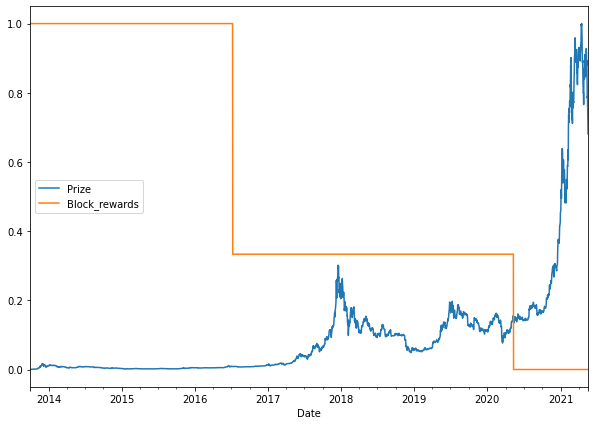

In [57]:
from sklearn.preprocessing import minmax_scale
scaled_price_block=pd.DataFrame(minmax_scale(bitcoin_table[['Prize','Block_rewards']]),
                                             columns=bitcoin_table.columns,
                                             index=bitcoin_table.index)
scaled_price_block.plot(figsize=(10,7))

In [58]:
HORIZON=1 
WINDOW_SIZE=7
bitcoin_windowed=bitcoin_table.copy()
for i in range(WINDOW_SIZE):
    bitcoin_windowed[f"Prize+{i+1}"]=bitcoin_windowed['Prize'].shift(periods=i+1)
x=bitcoin_windowed.dropna().drop("Prize",axis=1).astype(np.float32)
y=bitcoin_windowed.dropna()['Prize'].astype(np.float32)
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Prize, dtype: float32

In [59]:
split_size=int(len(x)*0.8)
x_train,y_train=x[:split_size],y[:split_size]
x_test,y_test=x[split_size:],y[split_size:]
len(x_test)

556

#**DENSE MODEL**(multivariate model)

In [60]:
model_5=tf.keras.Sequential([
        layers.Dense(128,activation='relu'),
        layers.Dense(HORIZON)
],name='Model_5')
model_5.compile(loss='mae',
                optimizer=tf.optimizers.Adam())
model_5.fit(x_train,y_train,
            validation_data=(x_test,y_test),
            epochs=100,
            batch_size=32,
            callbacks=[model_checkpoint(model_5.name)],
            verbose=1)


Epoch 1/100
70/70 [==============================] - 1s 15ms/step - loss: 327.5744 - val_loss: 945.7209
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 161.8062 - val_loss: 784.7339
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 148.0201 - val_loss: 798.8521
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 134.9805 - val_loss: 705.8641
Epoch 5/100
70/70 [==============================] - 1s 7ms/step - loss: 132.8183 - val_loss: 665.2753
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 126.1993 - val_loss: 695.3306
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 132.2460 - val_loss: 658.9142
Epoch 8/100
70/70 [==============================] - 1s 7ms/step - loss: 125.9675 - val_loss: 625.0025
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 117.0896 - val_loss: 691.6758
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss

In [61]:
model_5.evaluate(x_test,y_test)
model_5_pred = predicting(model_5,x_test) 
model_5_result= eval_2d(y_test,model_5_pred)
model_5_result


18/18 [==============================] - 0s 1ms/step


{'mae': 583.24585,
 'mse': 1188138.1,
 'rmse': 1090.0175,
 'mape': 2.6457548,
 'mase': 1.0246015}

In [62]:
model_3_result

{'mae': 623.8091,
 'mse': 1344917.5,
 'rmse': 1159.7058,
 'mape': 2.7858138,
 'mase': 1.0958598}

#**N-BEAT MODEL**

https://arxiv.org/pdf/1905.10437.pdf: this is the paper work of n-beat model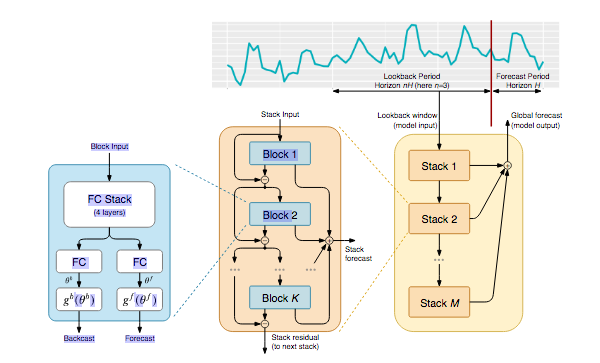



Above shown model is the n-beat model where the input are inserted using stack ie stack input.This model follows LSTM method. Backcast and forecast are the outputs provided by each block


---

'+'  and   '-' are used to add up and subtract the layer input and output respectively

In [63]:
class Nbeat_block(tf.keras.layers.Layer):
    def __init__(self,
                 input_size:int,
                 thetha_size:int,
                 horizon:int,
                 n_neutron:int,
                 n_layer:int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size=input_size
        self.thetha_size=thetha_size
        self.horizon=horizon
        self.n_neutron=n_neutron
        self.n_layer=n_layer
        self.hidden=[tf.keras.layers.Dense(n_neutron,activation='relu') for _ in range(n_layer)]
        self.thetha_layer=tf.keras.layers.Dense(thetha_size,activation='linear', name='thetha')
    def call(self,inputs):
        x=inputs
        for layer in self.hidden:
            x=layer(x)
        thetha=self.thetha_layer(x)
        backcast,forecast=thetha[:,:self.input_size],thetha[:,-self.horizon]
        return backcast,forecast
dummy_nbeats=Nbeat_block(input_size=WINDOW_SIZE,
                         thetha_size=WINDOW_SIZE+HORIZON,
                         horizon=HORIZON,
                         n_neutron=128,
                         n_layer=4)
dummy_input=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [64]:
backcast,forecast=dummy_nbeats(dummy_input)
tf.squeeze(backcast)


<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.23694727, -0.28999954,  0.40288323,  0.07566581, -0.9089352 ,
       -0.2446046 ,  0.8295453 ], dtype=float32)>

In [65]:
forecast

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13733491], dtype=float32)>

In [66]:
bitcoin_prize


,Prize
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [67]:
HORIZON=1
WINDOW_SIZE=7 
bitcoin_prize_nbeat=bitcoin_prize.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prize_nbeat[f'Prize{i+1}']=bitcoin_prize['Prize'].shift(periods=i+1)
bitcoin_prize_nbeat.dropna().head()

,Prize,Prize1,Prize2,Prize3,Prize4,Prize5,Prize6,Prize7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [68]:
x=bitcoin_prize_nbeat.dropna().drop('Prize',axis=1)
y=bitcoin_prize_nbeat.dropna()['Prize']


In [69]:
split_size=int(len(x)*0.8)
x_train,y_train=x[:split_size],y[:split_size]
x_test,y_test=x[split_size:],y[split_size:]
x_train.shape

(2224, 7)

In [70]:
train_feature_data=tf.data.Dataset.from_tensor_slices(x_train)
train_label_data=tf.data.Dataset.from_tensor_slices(y_train)
test_feature_data=tf.data.Dataset.from_tensor_slices(x_test)
test_label_data=tf.data.Dataset.from_tensor_slices(y_test)


In [71]:
train_dataset=tf.data.Dataset.zip((train_feature_data,train_label_data))
test_dataset=tf.data.Dataset.zip((test_feature_data,test_label_data))
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [72]:
N_EPOCHS=5
N_NEURONS=512
N_LAYER=4
N_STACK=30
INPUT_SIZE=WINDOW_SIZE*HORIZON
THETHA_SIZE=INPUT_SIZE+HORIZON

In [73]:
%%time
nbeat_layer=Nbeat_block(input_size=INPUT_SIZE,
                        thetha_size=THETHA_SIZE,
                        horizon=HORIZON,
                        n_neutron=N_NEURONS,
                        n_layer=N_LAYER,
                        name='model_nbeat')
stack_layer=layers.Input(shape=(INPUT_SIZE),name='stack_input')
backcast,forecast=nbeat_layer(stack_layer)
residual=layers.subtract([stack_layer,backcast],name='residual')
for i, _ in enumerate(range(N_STACK-1)):
    backcast,block_forecast=Nbeat_block(input_size=INPUT_SIZE,
                        thetha_size=THETHA_SIZE,
                        horizon=HORIZON,
                        n_neutron=N_NEURONS,
                        n_layer=N_LAYER,
                        name=f"model_nbeat{i}")(residual)
    residual=layers.subtract([residual,backcast],name=f'residual{i}')
    forecast=layers.add([forecast,block_forecast],name=f'forecast{i}')
model_7=tf.keras.Model(inputs=stack_layer,
                       outputs=forecast,
                       name='model_nbeat')


CPU times: user 1.5 s, sys: 52.6 ms, total: 1.55 s
Wall time: 1.41 s


In [74]:
%%time
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae','mse'])
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,
                                                            verbose=1)])

Epoch 1/5
3/3 [==============================] - 14s 2s/step - loss: 30182.4355 - mae: 26569.3047 - mse: 2128862848.0000 - val_loss: 1839.4547 - val_mae: 1839.4547 - val_mse: 9336022.0000 - lr: 0.0010
Epoch 2/5
3/3 [==============================] - 5s 1s/step - loss: 7236.3271 - mae: 7447.8354 - mse: 134721776.0000 - val_loss: 11270.8750 - val_mae: 11270.8750 - val_mse: 225241600.0000 - lr: 0.0010
Epoch 3/5
3/3 [==============================] - 5s 1s/step - loss: 1909.7006 - mae: 6253.4136 - mse: 106977448.0000 - val_loss: 1949.3929 - val_mae: 1949.3929 - val_mse: 9203825.0000 - lr: 0.0010
Epoch 4/5
3/3 [==============================] - 5s 1s/step - loss: 596.6074 - mae: 759.6950 - mse: 1167160.0000 - val_loss: 7645.5938 - val_mae: 7645.5938 - val_mse: 107082200.0000 - lr: 0.0010
Epoch 5/5
3/3 [==============================] - 5s 1s/step - loss: 2375.1633 - mae: 3020.7976 - mse: 17187782.0000 - val_loss: 1416.6294 - val_mae: 1416.6294 - val_mse: 5212678.5000 - lr: 0.0010
CPU times:

In [75]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 337ms/step - loss: 1416.6294 - mae: 1416.6294 - mse: 5212678.5000


[1416.62939453125, 1416.62939453125, 5212678.5]

In [76]:
model_7_pred=model_7.predict(test_dataset)
model_7_result=eval_2d(y_test,model_7_pred)
model_7_result


1/1 [==============================] - 1s 1s/step


{'mae': 1416.6294,
 'mse': 5212678.5,
 'rmse': 2283.1292,
 'mape': 6.5653143,
 'mase': 2.4886255}

This is the graphical represetation of our model

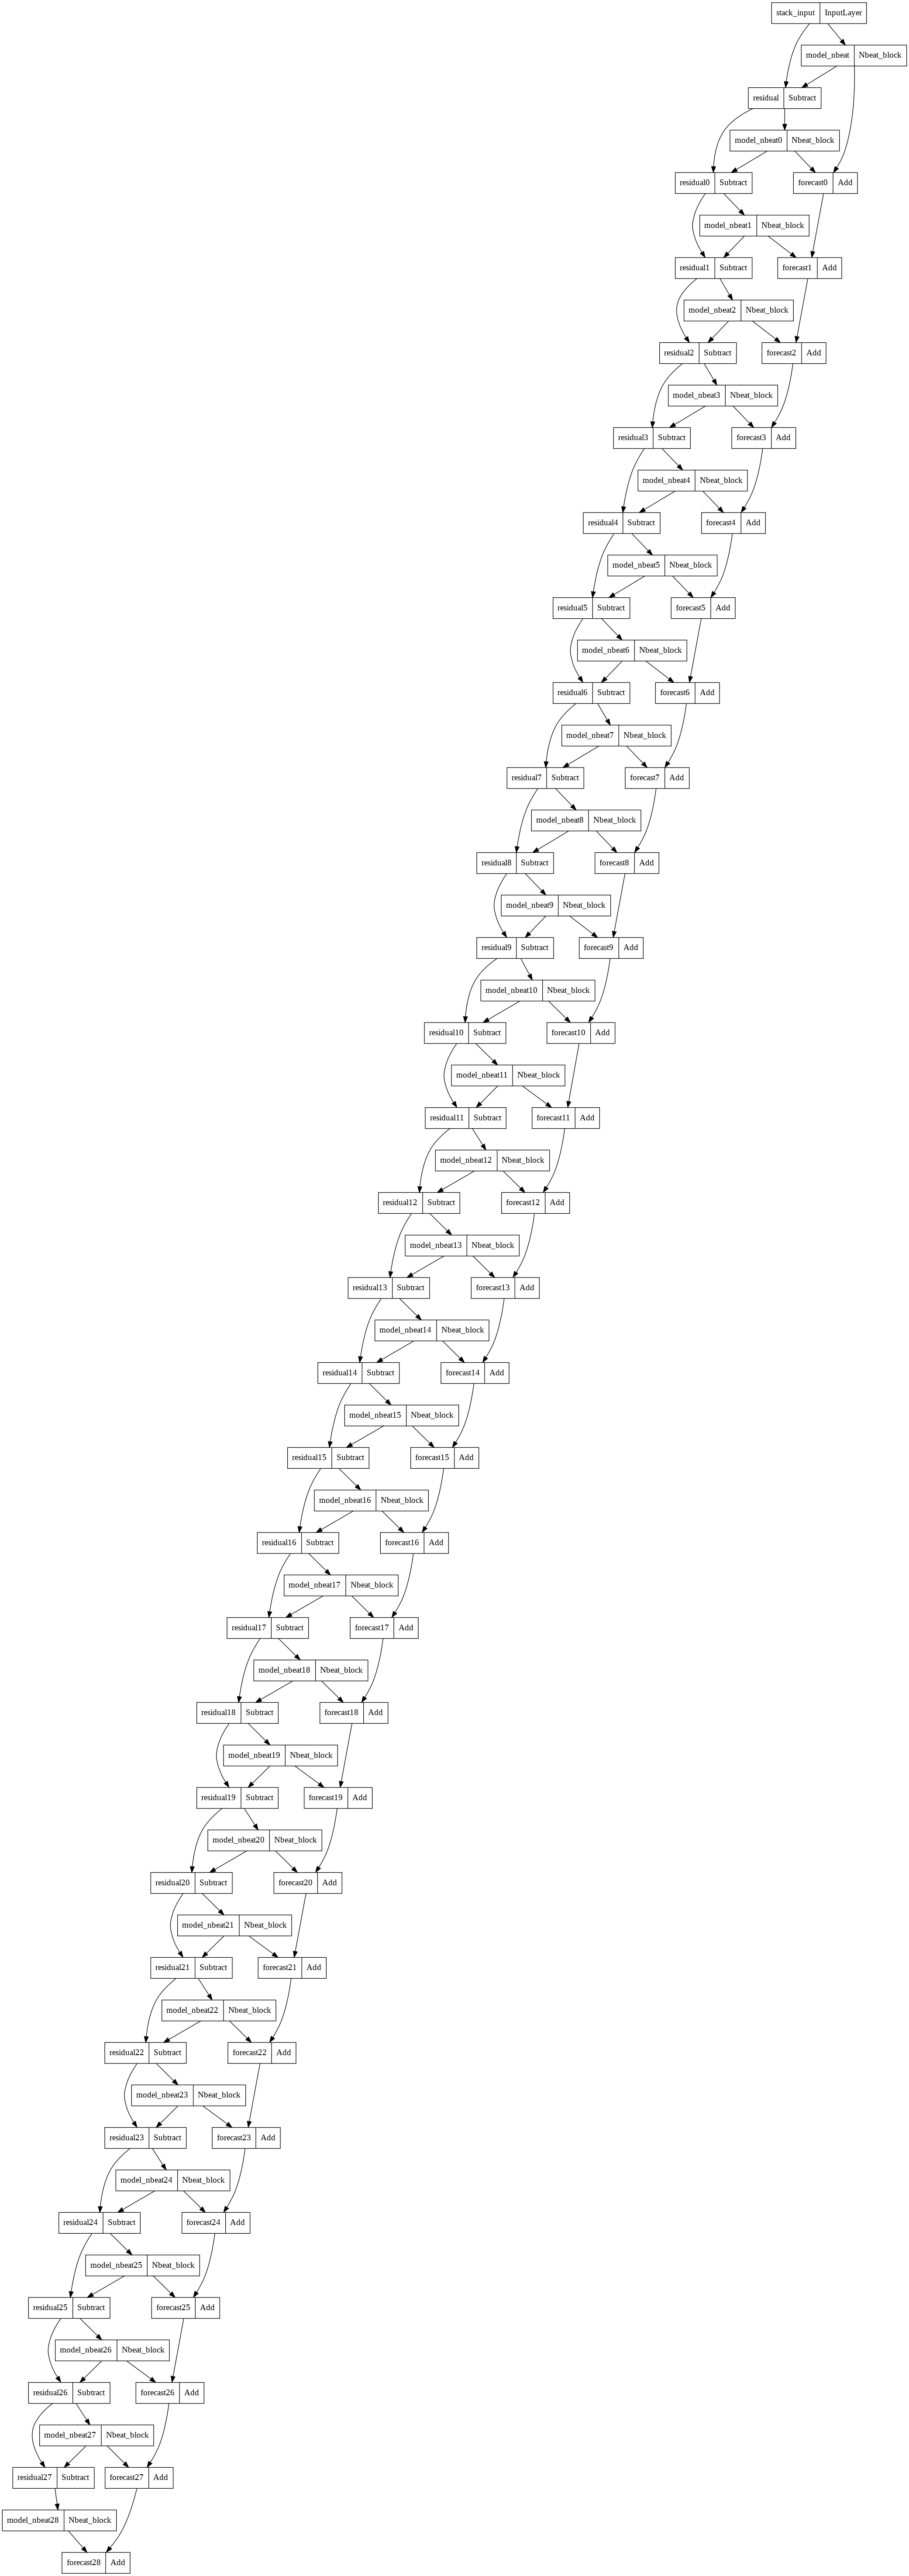

In [77]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

#**ENSEMBLE_MODEL** (collection of multipul model outcome and picking up the best)

In [78]:
def ensemble_model(horizon=HORIZON,
                   train_data=train_dataset,
                   test_data=test_dataset,
                   num_iter=5,
                   n_epoch=10,
                   loss=['mae','mse','mape']):
    ensemble_=[]
    for i in range(num_iter):#creating and fitting many model

        for loss_fun in loss:
            print(f"Optimizing model by reducing: {loss_fun} for {n_epoch} epochs, model number: {i}")
            model=tf.keras.Sequential([
                layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                layers.Dense(HORIZON)
            ])
            model.compile(loss=loss_fun,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae','mse'])
            model.fit(train_data,
                    validation_data=test_dataset,
                    epochs=n_epoch,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=200,
                                                                restore_best_weights=True),
                                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                    patience=100,
                                                                    )]
                    )
            ensemble_.append(model)
    return ensemble_

In [79]:
ensemble_model_call=ensemble_model()

Optimizing model by reducing: mae for 10 epochs, model number: 0
Epoch 1/10
3/3 [==============================] - 0s 53ms/step - loss: 792.1637 - mae: 792.1637 - mse: 1566285.2500 - val_loss: 1878.9464 - val_mae: 1878.9464 - val_mse: 10704602.0000 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 376.7367 - mae: 376.7367 - mse: 570494.9375 - val_loss: 1452.1161 - val_mae: 1452.1161 - val_mse: 6611410.5000 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 445.9095 - mae: 445.9095 - mse: 778958.5000 - val_loss: 1436.3252 - val_mae: 1436.3252 - val_mse: 6757382.0000 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 333.3609 - mae: 333.3609 - mse: 464591.4688 - val_loss: 1675.1487 - val_mae: 1675.1487 - val_mse: 7600185.5000 - lr: 0.0010
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 262.9364 - mae: 262.9364 - mse: 335745.5000 - val_loss: 1276.7137 - val_mae: 1276.713

In [80]:
def ensemble_model_pred(model_name,data):
    ensemble_pred =[]
    for model in ensemble_model_call:
        preds=model.predict(data)
        ensemble_pred.append(preds)
    return tf.constant(tf.squeeze(ensemble_pred))
ensemble_pred=ensemble_model_pred(ensemble_model_call,test_dataset)

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 39ms/step


In [81]:
ensemble_model_result=eval_2d(y_test,np.median(ensemble_pred,axis=0))
ensemble_model_result

{'mae': 971.1285,
 'mse': 2907426.0,
 'rmse': 1705.1176,
 'mape': 4.427141,
 'mase': 1.7060038}

We know that the price of the bitcoin is uncertain and it isn't possible to predict the exact price of the bitcoin. Hence we set a prediction range for some values which has predicted by our model. We multiply the pred_value with 1.96. We know that the maxima and minima value of any probabilty value is ranges from -1.96 and +1.96 


---
Refer:https://en.wikipedia.org/wiki/97.5th_percentile_point


In [82]:
def get_bound(pred):
    std=tf.math.reduce_std(pred,axis=0)
    interval=std*1.96
    pred_mean=tf.reduce_mean(pred,axis=0)
    lower,upper=pred_mean-interval,pred_mean+interval
    return lower,upper
lower,upper=get_bound(ensemble_pred)


#**UNCERTAINITY MODEL**

---

We illustrate turkey model to predict the uncertainity in the bitcoin model

In [83]:
x_full=bitcoin_windowed.drop(['Prize','Block_rewards'],axis=1).dropna().to_numpy()
y_full=bitcoin_windowed.dropna()['Prize'].to_numpy()
features=tf.data.Dataset.from_tensor_slices(x_full)
label=tf.data.Dataset.from_tensor_slices(y_full)
dataset=tf.data.Dataset.zip((features,label))
dataset=dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [84]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [85]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
model_9.fit(dataset,
            epochs=100,
            verbose=0)

In [86]:
WINDOW

7

In [87]:


# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] 
  for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())

        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast



In [88]:
INTO_FUTURE=14
future_forecast = make_future_forecast(values=y_full,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 43ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55881.53125

1/1 [==============================] - 0s 13ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55881.53125   ] -> Prediction: 51063.06640625

1/1 [==============================] - 0s 15ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55881.53125    51063.06640625] -> Prediction: 48624.88671875

1/1 [==============================] - 0s 14ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55881.53125    51063.06640625 48624.88671875] -> Prediction: 48238.29296875

1/1 [==============================] - 0s 14ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55881.53125
 51063.06640625 48624.88671875 48238.2929687

In [89]:
def get_future(start_date,info_fut,offset=1):
    start_date=start_date+np.timedelta64(offset,'D')
    end_date=start_date+np.timedelta64(info_fut,'D')
    return np.arange(start_date,end_date,dtype='datetime64[D]')
start_date=bitcoin_windowed.index[-1]
start_date
next_time=get_future(start_date=start_date,info_fut=INTO_FUTURE)
next_time

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [90]:
next_time=np.insert(next_time,0,start_date)
forecast_time=np.insert(future_forecast,0,btcp[-1])
next_time,forecast_time

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55881.53 , 51063.066, 48624.887, 48238.293, 48016.418,
        47004.75 , 48464.332, 54163.51 , 49864.21 , 47810.637, 48372.215,
        49084.75 , 48913.086, 50547.562], dtype=float32))

In [91]:
turkey_=btcp.copy()
turkey_[-1]=turkey_[-1]/100
turkey_[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [92]:
btc_turkey=np.array(bitcoin_prize.index)
btc_turkey

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

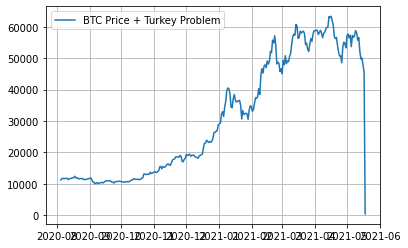

In [93]:
plotting(timesnaps=btc_turkey,
         value=turkey_,
         format='-',
         start=2500,
         label="BTC Price + Turkey Problem") # the immediate downfall in the price is the uncertainty

In [94]:
full_window,full_label=make_window(np.array(turkey_),window_size=WINDOW,horizon=HORIZON)
x_train,y_train,x_test,y_test=make_split(full_window,full_label)

In [95]:
turkey_model=tf.keras.models.clone_model(model_1)
turkey_model._name='turkey'
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(x_train,y_train,
                 validation_data=(x_test,y_test),
                                  epochs=10
                                  )

Epoch 1/10
70/70 [==============================] - 0s 3ms/step - loss: 384.1428 - val_loss: 1122.1173
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 178.5351 - val_loss: 997.8284
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 170.1956 - val_loss: 924.3738
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 154.6980 - val_loss: 889.3416
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 157.9037 - val_loss: 906.9343
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 144.2284 - val_loss: 821.6981
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 144.9876 - val_loss: 803.0443
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 141.4207 - val_loss: 805.1879
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 130.2868 - val_loss: 988.8568
Epoch 10/10
70/70 [==============================] - 0s 2ms/step - loss: 140.3867

In [96]:
turkey_pred=predicting(turkey_model,x_test)
turkey_result=eval_2d(y_test,turkey_pred)
turkey_result

18/18 [==============================] - 0s 954us/step


{'mae': 17183.256,
 'mse': 618694000.0,
 'rmse': 23827.402,
 'mape': 122.09919,
 'mase': 26.591146}